<h1 style="text-align: center">Make Sense of Deep Neural Networks using TensorBoard</h1>
<table style="border: none">
    <tr style="border: none">
        <td style="border: none">
            <h2>Arpan Chakraborty</h2>
            <p><a href="https://www.twitter.com/@runoffthemill">@runoffthemill</a><br />
            <a href="https://github.com/napratin">github.com/napratin</a></p>
        </td>
        <td style="border: none">
            <a href="https://www.udacity.com"><img src="images/udacity-logo_with-label.png" alt="Udacity logo" width="400" height="400" /></a>
        </td>
    </tr>
</table>

## Getting Started

_Note: This notebook is written in Python 3. You'll need Jupyter/iPython to run it._

### Local installation

Fetch the repo: [github.com/PythonWorkshop/tensorboard_demos](https://github.com/PythonWorkshop/tensorboard_demos)

```bash
git clone git@github.com:PythonWorkshop/tensorboard_demos
cd tensorboard_demos/
```

#### Option A: Conda install

```bash
conda env create
source activate tensorflow
jupyter notebook tensorboard_basics.ipynb
```

#### Option B: Pip install

```bash
pip3 install numpy matplotlib scikit-learn
pip3 install --upgrade <binary URL for your system>
jupyter notebook tensorboard_basics.ipynb
```

See [TensorFlow instructions](https://www.tensorflow.org/versions/master/get_started/os_setup.html#pip-installation) to pick the correct binary URL for your system.

### Binder (_coming soon_)

If you have trouble getting TensorFlow to work, go to the [repo](https://github.com/PythonWorkshop/tensorboard_demos) and hit the **launch binder** badge to run in the cloud. Note that this is an experimental feature.

## Generate Some Data to Classify

In [1]:
import numpy as np

dataset_size = (1000, 2)  # (samples, features)
num_classes = 2  # binary classification
X = np.random.random(dataset_size)
y = np.int_(X[:, 0] * X[:, 0] + X[:, 1] >= 1).reshape(-1, 1)

In [2]:
print("Features (X): {shape[0]}x{shape[1]}".format(shape=X.shape))
print(X[:10])

Features (X): 1000x2
[[ 0.56178561  0.32721616]
 [ 0.86852964  0.35913992]
 [ 0.04702766  0.91946145]
 [ 0.63636712  0.42633783]
 [ 0.24494064  0.01611095]
 [ 0.20685131  0.94195279]
 [ 0.54635292  0.28863868]
 [ 0.96459709  0.02924469]
 [ 0.31743234  0.76381701]
 [ 0.79064661  0.32483967]]


In [3]:
print("Labels (y): {shape[0]}".format(shape=y.shape))
print(y[:10])

Labels (y): 1000
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


## Visualize Data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_data_2D(X, **kwargs):
    """Plot 2D data points in X = np.array([(x0, y0), (x1, y1), ...])."""
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.scatter(X[:, 0], X[:, 1],
               s=35, cmap=plt.cm.get_cmap('rainbow', num_classes), **kwargs)
    ax.set_aspect('equal')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return fig, ax

(<matplotlib.figure.Figure at 0x109b2b198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109b25e48>)

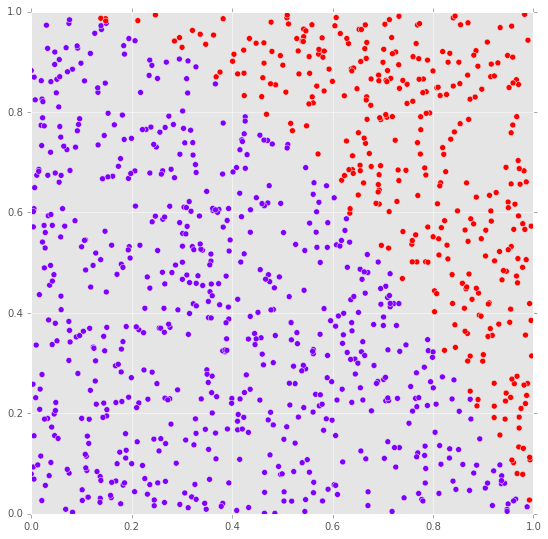

In [5]:
plot_data_2D(X, c=y)

## Prepare Data for Training and Testing

In [6]:
# Split data into training and test sets
from sklearn.cross_validation import train_test_split

test_size = 300
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print("Split dataset: {} training, {} test samples".format(len(X_train), len(X_test)))

Split dataset: 700 training, 300 test samples


(<matplotlib.figure.Figure at 0x10db0eeb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f53f1d0>)

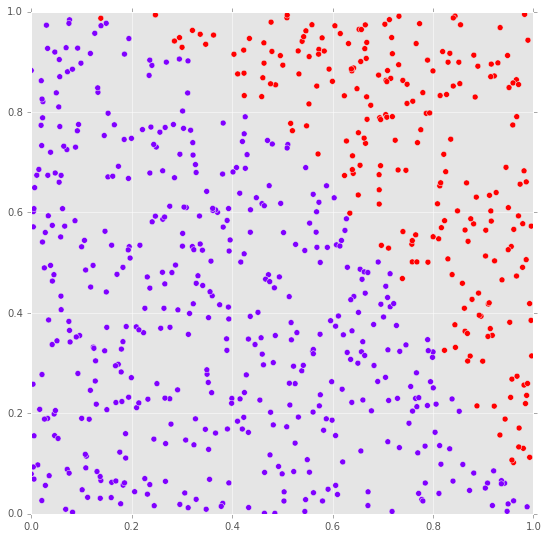

In [7]:
# Plot training data
plot_data_2D(X_train, c=y_train)

(<matplotlib.figure.Figure at 0x10f588080>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f5a0b70>)

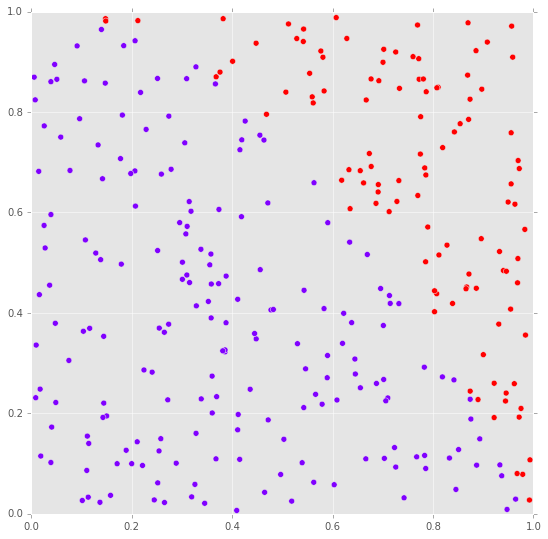

In [8]:
# Plot test data
plot_data_2D(X_test, c=y_test)

## Build Computation Graph
This graph defines the structure of your Neural Network as well as information flow.

In [9]:
import tensorflow as tf

# Create a TensorFlow session
session = tf.Session()

# Placeholders for input features and ground truth labels
X_placeholder = tf.placeholder(tf.float32,
                               shape=(None, dataset_size[1]),
                               name="X")
y_placeholder = tf.placeholder(tf.int64,
                               shape=(None, 1),
                               name="y")

### Define helper functions

In [10]:
def plot_activation(func, title, x_min=-10.0, x_max=10.0, num_samples=100):
    """Visualize a given activation function as a curve."""
    x = np.linspace(x_min, x_max, num_samples)
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(x, func(x), linewidth=3)
    ax.set_title(title)
    ax.patch.set_facecolor('white')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(-0.1, 1.1)

### Define layer creation functions

In [11]:
def linear_layer(input_tensor, num_units):
    """Linear activation layer: output = inputs * weights + biases"""
    num_inputs = input_tensor.get_shape()[1].value  # inspect tensor size
    weights = tf.Variable(
        tf.truncated_normal([num_inputs, num_units], stddev=1.0),
        name='weights')
    biases = tf.Variable(
        tf.zeros([num_units]),
        name='biases')
    return tf.add(tf.matmul(input_tensor, weights, name='multiply'), biases,
                  name='add')

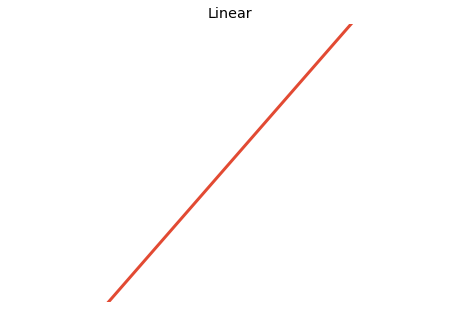

In [12]:
plot_activation(lambda x: 0.5 + 0.1*x, title='Linear')  # example

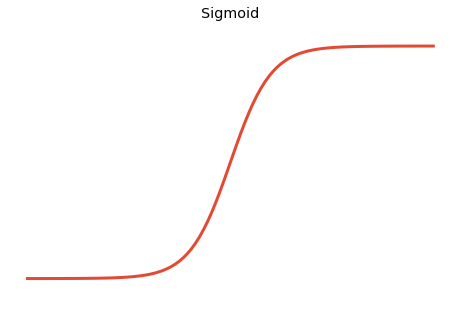

In [13]:
def sigmoid_layer(input_tensor, num_units):
    """Sigmoid activation layer: output = sigmoid(inputs * weights + biases)"""
    return tf.nn.sigmoid(linear_layer(input_tensor, num_units), name='sigmoid')

plot_activation(lambda x: 1.0 / (1.0 + np.exp(-x)), title='Sigmoid')  # example

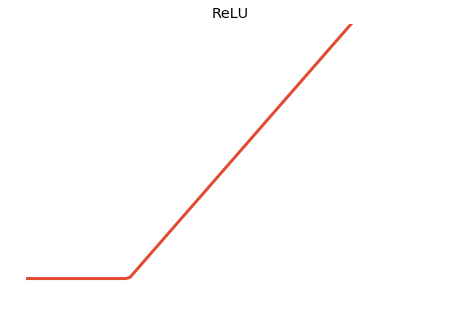

In [14]:
def relu_layer(input_tensor, num_units):
    """ReLU activation layer: output = ReLU(inputs * weights + biases)"""
    return tf.nn.relu(linear_layer(input_tensor, num_units), name='relu')

plot_activation(lambda x: (0.5 + 0.1*x).clip(min=0), title='ReLU')  # example

### Create network structure

In [15]:
# Let's make a network with 2 hidden layers (and an output layer)
hidden1_num_units = 10
hidden2_num_units = 3
output_num_units = 1  # binary classification needs only 1 output

with tf.name_scope('hidden1'):
    hidden1 = relu_layer(X_placeholder, hidden1_num_units)

with tf.name_scope('hidden2'):
    hidden2 = relu_layer(hidden1, hidden2_num_units)

with tf.name_scope('output'):
    output = sigmoid_layer(hidden2, output_num_units)

### Choose an error metric

In [16]:
def l2_loss(logits, labels):
    """Euclidean distance or L2-norm: sqrt(sum((logits - labels)^2))"""
    labels = tf.to_float(labels)
    return tf.nn.l2_loss(logits - labels, name='l2_loss')

with tf.name_scope('error'):
    error = l2_loss(output, y_placeholder)  # predicted vs. true labels
    tf.scalar_summary(error.op.name, error)  # write error (loss) to log

In [17]:
# Other possible error metrics
def mse_loss(logits, labels):
    """Mean squared error: mean(sum((logits - labels)^2)"""
    labels = tf.to_float(labels)
    return tf.reduce_mean(tf.square(logits - labels), name='mse_loss')

def cross_entropy_loss(logits, labels):
    """Mean cross-entropy loss: mean(cross_entropy(softmax(logits), labels))"""
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, labels,
        name='cross_entropy')
    return tf.reduce_mean(cross_entropy, name='cross_entropy_mean')

In [18]:
print("Nodes in computation graph:"
    + "\n  Input features: {}".format(X_placeholder)
    + "\n  Hidden layer 1: {}".format(hidden1)
    + "\n  Hidden layer 2: {}".format(hidden2)
    + "\n  Output labels : {}".format(output)
    + "\n  Ground truth  : {}".format(y_placeholder)
    + "\n  Error metric  : {}".format(error))

Nodes in computation graph:
  Input features: Tensor("X:0", shape=(?, 2), dtype=float32)
  Hidden layer 1: Tensor("hidden1/relu:0", shape=(?, 10), dtype=float32)
  Hidden layer 2: Tensor("hidden2/relu:0", shape=(?, 3), dtype=float32)
  Output labels : Tensor("output/sigmoid:0", shape=(?, 1), dtype=float32)
  Ground truth  : Tensor("y:0", shape=(?, 1), dtype=int64)
  Error metric  : Tensor("error/l2_loss:0", shape=(), dtype=float32)


## Setup Logging
These logs are later read and visualized by TensorBoard.

In [19]:
import time
import os

log_basedir = "logs"
run_label = time.strftime('%Y-%m-%d_%H-%M-%S')  # e.g. 2016-08-18_21-30-45
log_path = os.path.join(log_basedir, run_label)
all_summaries = tf.merge_all_summaries()
summary_writer = tf.train.SummaryWriter(log_path, session.graph)
print("Logging to: {}".format(log_path))

Logging to: logs/2016-08-20_03-58-53


## Train your Model

In [20]:
# Pick a training algorithm
def sgd_train(error, learning_rate=0.01):
    """Gradient descent optimizer for training.
    
    Creates an optimizer to compute and apply gradients to all trainable variables.
    
    Args:
        error: Error (loss) metric.
        learning_rate: Controls the size of each step the optimizer takes.
    Returns:
        training: Training operation, ready to be called with tf.Session.run().
    """
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    return optimizer.minimize(error)

with tf.name_scope('training'):
    training = sgd_train(error)

In [21]:
# Define training parameters
num_steps = 1000  # how many iterations to train for
batch_size = 100  # how many samples in each iteration

# Initialize variables
init_op = tf.initialize_all_variables()
session.run(init_op)

In [22]:
# Run training operation for num_steps iterations
for step in range(num_steps):
    # Randomly pick batch_size samples from training set
    sample_idx = np.random.choice(len(X_train), batch_size, replace=False)
    feed_dict = {
        X_placeholder: X_train[sample_idx, :],
        y_placeholder: y_train[sample_idx, :]
    }
    # Note: feed_dict uses placeholder objects as key!

    # Train for one iteration, time it
    start_time = time.time()
    _, error_value = session.run([training, error], feed_dict=feed_dict)
    duration = time.time() - start_time

    # Print an overview and write summaries (logs) every 100 iterations
    if step % 100 == 0 or step == (num_steps - 1):
        print("Step {:4d}: training error = {:5.2f} ({:.3f} sec)"
            .format(step, error_value, duration))
        summary_str = session.run(all_summaries, feed_dict=feed_dict)
        summary_writer.add_summary(summary_str, step)
        summary_writer.flush()

Step    0: training error = 12.55 (0.009 sec)
Step  100: training error =  6.57 (0.003 sec)
Step  200: training error =  2.04 (0.004 sec)
Step  300: training error =  1.74 (0.003 sec)
Step  400: training error =  1.38 (0.003 sec)
Step  500: training error =  0.85 (0.002 sec)
Step  600: training error =  0.78 (0.003 sec)
Step  700: training error =  0.47 (0.002 sec)
Step  800: training error =  0.69 (0.002 sec)
Step  900: training error =  0.67 (0.003 sec)
Step  999: training error =  0.61 (0.003 sec)


## Test your Model

In [23]:
# Check performance on test set
y_test_pred, test_error = session.run([output, error], feed_dict={
    X_placeholder: X_test,
    y_placeholder: y_test
})
# Note: The placeholder shapes must be compatible with the tensors being supplied!

Test error = 2.73 (4 mismatches)


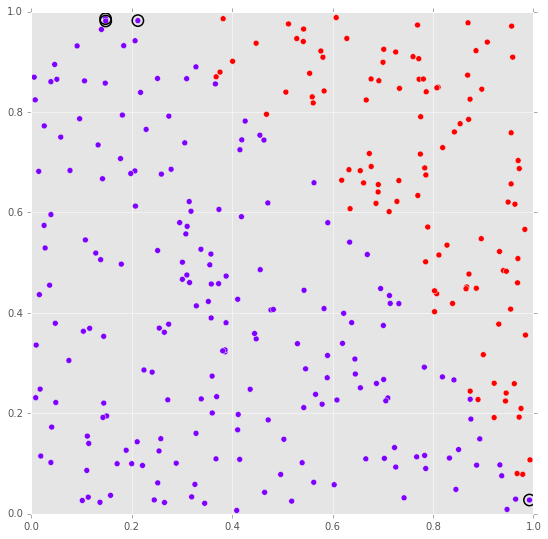

In [24]:
y_test_pred = np.int_(np.round_(y_test_pred))
mismatches = (y_test_pred - y_test).flat != 0
print("Test error = {:.2f} ({} mismatches)"
      .format(test_error, sum(np.int_(mismatches))))

_, ax = plot_data_2D(X_test, c=y_test_pred)
ax.scatter(X_test[mismatches, 0], X_test[mismatches, 1],
           s=128, marker='o', facecolors='none', edgecolors='black', linewidths=1.5)

## Visualize using TensorBoard

Run TensorBoard with the following command, passing in the appropriate log directory:
```bash
tensorboard --logdir=logs
```

And then open the URL that gets printed, in your browser (typically: [http://0.0.0.0:6006](http://0.0.0.0:6006)).

## References

This demo notebook is based on:
- [TensorBoard: Visualizing Learning](https://www.tensorflow.org/versions/master/how_tos/summaries_and_tensorboard/index.html)
- [TensorBoard: Graph Visualization](https://www.tensorflow.org/versions/master/how_tos/graph_viz/index.html)
- [MNIST Tutorial](https://github.com/tensorflow/tensorflow/tree/r0.8/tensorflow/examples/tutorials/mnist)

<table style="border: none">
    <tr style="border: none">
        <td style="border: none">
            <h2>Arpan Chakraborty</h2>
            <p><a href="https://www.twitter.com/@runoffthemill">@runoffthemill</a><br />
            <a href="https://github.com/napratin">github.com/napratin</a></p>
        </td>
        <td style="border: none">
            <a href="https://www.udacity.com"><img src="images/udacity-logo_with-label.png" alt="Udacity logo" width="400" height="400" /></a>
        </td>
    </tr>
</table>